<a href="https://colab.research.google.com/github/julianovale/optimization_metaheuristics_python/blob/master/0005_continuous_problem_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Função objetivo:

Min Z = (x^2 + y + 11)^2 + (x + y^2 - 7)^2

-6 <= x, y <= 6

Solução ótima = 0.0

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import random

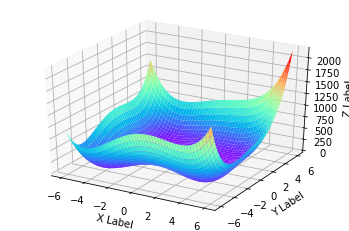

In [6]:
def fun(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap = 'rainbow')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [10]:
y_array = np.array([1,1,0,1]) # y
x_array = np.array([0,1,1,0]) # x
chromosome_test = np.concatenate((y_array, x_array))
chromosome_test

array([1, 1, 0, 1, 0, 1, 1, 0])

In [8]:
# os índices poderiam ser (0, 1, 2, 3,
#                          4, 5, 6, 7)
# ou
# os índices poderiam ser ([-8], [-7], [-6], [-5],
#                          [-4], [-3], [-2], [-1])
#
# bit = gene, chamamos de bit porque são 0 ou 1 (binary digit)
#
# exemplos para x: (bit*(2^z)):
# (0*(2^0))+(1*(2^1))+(1*(2^2))+(0*(2^3))
# ([4]*(2^0))+([5]*(2^1))+([6]*(2^2))+([7]*(2^3))
# ([-1]*(2^0))+([-2]*(2^1))+([-3]*(2^2))+([-4]*(2^3))
#
# função objetivo: f(x, y) = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
# exemplo de decodificação para x: (sum(bit_x*(2^z))* precision_x + lb_x) ##### up = upper bound; lb = lower bound.
# exemplo de precisão para x: (up_x - lb_x) / ((2^len_x)-1) 


In [13]:
print("### para a variável x ###")
z = 0 # porque se começa em 2^0 na fórmula
t = 1 # porque nós vamos começar no último elemento [índice -1] decrescendo em 1
x_bit_sum = 0
for i in range(len(chromosome_test)//2):
  print()
  print('o índice é: ',-t)
  print('o bit é: ',chromosome_test[-t])
  print('o z para {} é: {}'.format(chromosome_test[-t],z))
  x_bit = chromosome_test[-t]*(2**z)
  print("{}*(2^{}) = {}".format(chromosome_test[-t],z,x_bit))
  x_bit_sum += x_bit
  t += 1
  z += 1
print()
print("sum(bit*(2^z)) is: ",x_bit_sum)

### para a variável x ###

o índice é:  -1
o bit é:  0
o z para 0 é: 0
0*(2^0) = 0

o índice é:  -2
o bit é:  1
o z para 1 é: 1
1*(2^1) = 2

o índice é:  -3
o bit é:  1
o z para 1 é: 2
1*(2^2) = 4

o índice é:  -4
o bit é:  0
o z para 0 é: 3
0*(2^3) = 0

sum(bit*(2^z)) is:  6


In [15]:
print("### para a variável y ###")
z = 0 # porque se começa em 2^0 na fórmula
t = 1 + len(chromosome_test)//2 # porque nós vamos começar na metade para y, [índice -5] decrescendo em 1
y_bit_sum = 0
for i in range(len(chromosome_test)//2):
  print()
  print('o índice é: ',-t)
  print('o bit é: ',chromosome_test[-t])
  print('o z para {} é: {}'.format(chromosome_test[-t],z))
  y_bit = chromosome_test[-t]*(2**z)
  print("{}*(2^{}) = {}".format(chromosome_test[-t],z,y_bit))
  y_bit_sum += y_bit
  t += 1
  z += 1
print()
print("sum(bit*(2^z)) is: ",y_bit_sum)

### para a variável y ###

o índice é:  -5
o bit é:  1
o z para 1 é: 0
1*(2^0) = 1

o índice é:  -6
o bit é:  0
o z para 0 é: 1
0*(2^1) = 0

o índice é:  -7
o bit é:  1
o z para 1 é: 2
1*(2^2) = 4

o índice é:  -8
o bit é:  1
o z para 1 é: 3
1*(2^3) = 8

sum(bit*(2^z)) is:  13
